In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle

In [ ]:
datanames = ["full_random", "clustered_random", "mnist", "kegg_net"]
algnames = ["classic", "yinyang", "my_k_means", "turbo"]

Last datasets:
n, d, seed = 16384, 64, 42
data1 = generate(n, d, seed = seed)
data2 = generate(n, d, true_d = 6, true_k = 200, noise = 0.025, seed = seed)
data3 = mnist(n, d, noise = 0.01, seed = seed)
data4 = kegg_net(n, noise = 0.01, seed = seed)

In [3]:
with open('log.pkl', 'rb') as f:
    log = pickle.load(f)

In [16]:
times_per_calc = [np.sum(run["classic"]["assign_times"]) / np.sum(run["classic"]["dist_calcs"]) for run in log.values()]
time_per_calc = np.mean(times_per_calc)
for run, res in sorted(log.items()):
    print("{} k = {:3}, iter = {},".format(*run, len(res[algnames[0]]["assign_times"])).ljust(36) , end = " ")
    print(", ".join(algname + ": {:.5}".format(res[algname]["total_time"]) for algname in algnames))
print("inconsistent runs: ", end = "")
for (run, res) in log.items():
    if not np.all(res["label_consistency"] == res["shape"][0]):
        print(run, end = ", ")

clustered_random k =   4, iter = 21, classic: 46.018, yinyang: 22.94, my_k_means: 21.895, turbo: 21.099
clustered_random k =   8, iter = 75, classic: 312.83, yinyang: 67.267, my_k_means: 62.69, turbo: 52.479
clustered_random k =  16, iter = 48, classic: 388.24, yinyang: 104.17, my_k_means: 92.637, turbo: 75.992
clustered_random k =  32, iter = 43, classic: 684.37, yinyang: 142.65, my_k_means: 115.95, turbo: 97.86
clustered_random k =  64, iter = 26, classic: 813.98, yinyang: 170.02, my_k_means: 134.24, turbo: 113.59
clustered_random k = 128, iter = 16, classic: 1001.9, yinyang: 203.32, my_k_means: 163.11, turbo: 148.09
clustered_random k = 256, iter = 15, classic: 1868.9, yinyang: 298.35, my_k_means: 253.99, turbo: 237.58
full_random k =   4, iter = 218,     classic: 495.37, yinyang: 219.59, my_k_means: 192.03, turbo: 181.87
full_random k =   8, iter = 198,     classic: 872.02, yinyang: 358.85, my_k_means: 312.68, turbo: 266.86
full_random k =  16, iter = 144,     classic: 1261.1, yiny

In [50]:
def plot_atimes(run):
    plt.title("Assignment times ({}, k = {})".format(*run))
    for algname in algnames:
        plt.plot(log[run][algname]["assign_times"], label = algname)
    plt.legend()
    plt.show()
    print(" ".join(str(log[run][algname]["total_time"]) for algname in algnames))

def plot_cum_atimes(run, algname):
    tot_atime = sum(log[run][algname]["assign_times"])
    plt.bar(np.arange(len(log[run][algname]["assign_times"])),
            log[run][algname]["assign_times"].cumsum() / tot_atime)
    #plt.legend()
    plt.show()  
    
def plot_dcalcs(run):
    plt.title("Distance calculations ({}, k = {})".format(*run))
    for algname in algnames:
        plt.plot(log[run][algname]["dist_calcs"], label = algname)
    plt.legend()
    plt.show()
    print(" ".join(str(sum(log[run][algname]["dist_calcs"])) for algname in algnames))

def plot_cum_dcalcs(run, algname):
    #plt.title("Distance calculations ({}, k = {})".format(*run))
    tot_calcs = sum(log[run][algname]["dist_calcs"])
    plt.bar(np.arange(len(log[run][algname]["dist_calcs"])),
            log[run][algname]["dist_calcs"].cumsum() / tot_calcs)
    #plt.legend()
    plt.show()    
    
def plot_stclusters(run):
    plt.title("Number of stable clusters ({}, k = {})".format(*run))
    plt.plot(log[run]["stable_clusters_num"])
    plt.show()
    
def plot_migrations(run):
    plt.title("Number of migrations ({}, k = {})".format(*run))
    plt.plot(log[run]["migrations"])
    plt.show()
    
def plot_upkeep(run, algname):
    plt.title("Upkeep times {}, k = {}, {}".format(*run, algname))
    plt.plot(log[run][algname]["assign_times"], label = "assignment")
    plt.plot(log[run][algname]["dist_calcs"] * time_per_calc, label = "distance calculation")
    plt.plot(log[run][algname]["assign_times"] - log[run][algname]["dist_calcs"] * time_per_calc, label = "upkeep")
    plt.legend()
    plt.show()
    tot_time = sum(log[run][algname]["assign_times"])
    dtime = sum(log[run][algname]["dist_calcs"]) * time_per_calc
    tot_upkeep = tot_time - dtime
    print(tot_time, dtime, tot_upkeep)



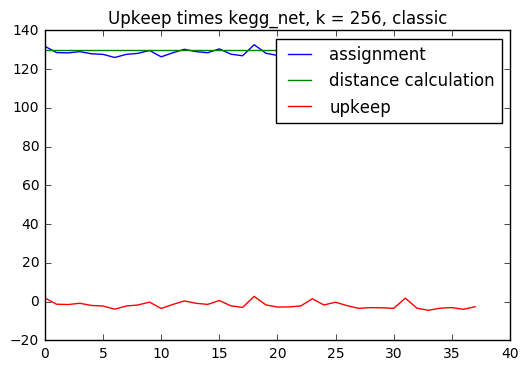

4869.44780003 4935.64168985 -66.1938898179


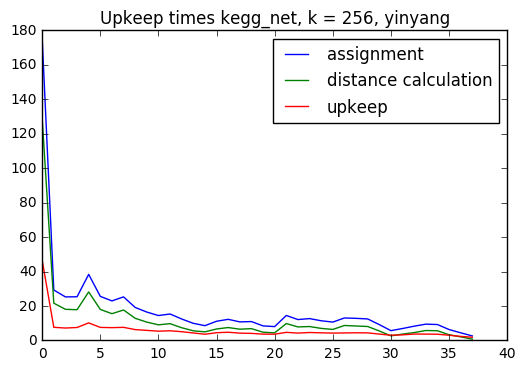

687.620274881 461.119281763 226.500993118


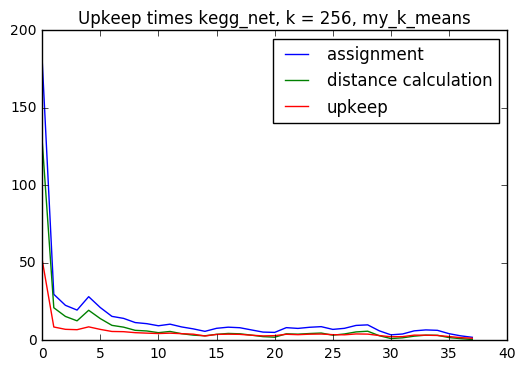

549.449279688 340.598230449 208.851049238


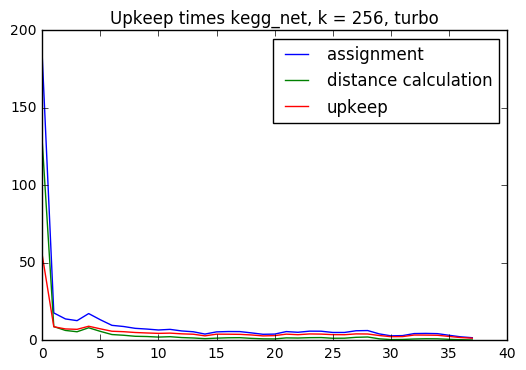

429.819618572 214.618396851 215.201221722


In [52]:
#plot_cum_dcalcs(("mnist",256), "turbo")

for algname in algnames:
    plot_upkeep(("kegg_net", 256), algname)




trash can

In [ ]:
       
        
'''
start = clock()
standard = KMeans(n_clusters = k, init = data[:k].copy(), 
                  algorithm = 'full', n_init = 1, tol = 0.,
                  precompute_distances = False).fit(data)
std_t = clock() - start
print("{:.4}".format(std_t).ljust(8), end = " | ")

start = clock()
Elkan = KMeans(n_clusters = k, init = data[:k].copy(), 
               algorithm = 'elkan', n_init = 1, tol = 0., 
               precompute_distances = False).fit(data) 
Elkan_t = clock() - start
print("{:.4}".format(std_t/Elkan_t).ljust(8))



print(max([dist(clas.clusters[i],yin.clusters[i]) for i in range(k)]), 
       sum(clas.best == yin.best), end = " | ")

print(max([dist(clas.clusters[i],my.clusters[-1][i]) for i in range(k)]), 
       sum(clas.best == my.best), end = " | ")

print(max([dist(clas.clusters[i],tur.clusters[-1][i]) for i in range(k)]), 
       sum(clas.best == tur.best), end = " | ")

print(max([dist(clas.clusters[i],standard.cluster_centers_[i]) for i in range(k)]), 
       sum(clas.best == standard.labels_), end = " | ")

print(max([dist(clas.clusters[i],Elkan.cluster_centers_[i]) for i in range(k)]), 
       sum(clas.best == Elkan.labels_), end = " | ")
'''
        
